In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction, step, impulse, bode


tick_positions = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi,
                 5*np.pi/4, 3*np.pi/2, 7*np.pi/4, 2*np.pi]
tick_labels = [r'$0$', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$',
              r'$\frac{3\pi}{4}$', r'$\pi$', r'$\frac{5\pi}{4}$',
              r'$\frac{3\pi}{2}$', r'$\frac{7\pi}{4}$', r'$2\pi$']
# grid(True, which="both", linestyle="--", linewidth=0.5)

start     = 0
end       = 10
separates = 1000
start_log = -2
end_log   = 2

Построить с помощью функции plot графики А(omega), fi(пе), U(omega), V(omega), L(omega) для апериодического звена. Параметры Т и К взять из таблицы 1. Изучить влияние параметра Т на вид fi(omega) и L(omega). Сделать выводы.

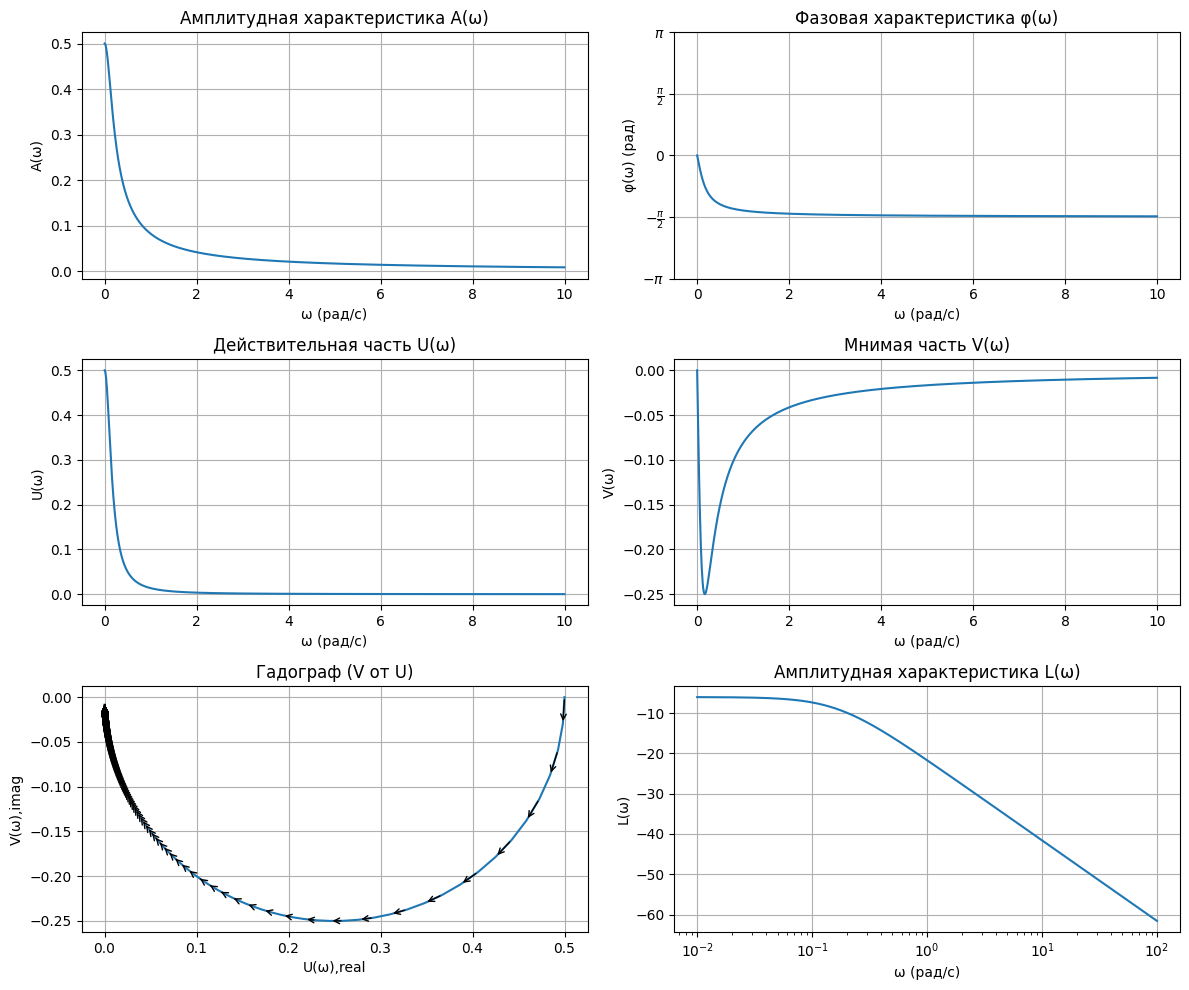

In [37]:
# Заданные параметры
k = 0.5
T = T1 = 6
T2 = 4
epsilon = 0.05

omega_log = np.logspace(start_log, end_log, separates)
omega     = np.linspace(start, end, separates)

# Частотные характеристики апериодического звена
U_omega = k / ((T * omega)**2 + 1)
V_omega = -k * T * omega / ((T * omega)**2 + 1)

U_omega_log = k / ((T * omega_log)**2 + 1)
V_omega_log = -k * T * omega_log / ((T * omega_log)**2 + 1)

A_omega = np.sqrt(V_omega**2 + U_omega**2)
A_omega_log = np.sqrt(V_omega_log**2 + U_omega_log**2)
L_omega = 20 * np.log10(A_omega_log)
phi_omega = np.arctan(V_omega/U_omega)


plt.figure(figsize=(12, 10))

ax1 = plt.subplot(3, 2, 1)
ax1.plot(omega, A_omega)
ax1.set_title("Амплитудная характеристика A(ω)")
ax1.set_xlabel("ω (рад/с)")
ax1.set_ylabel("A(ω)")
ax1.grid(True)

ax2 = plt.subplot(3, 2, 2)
ax2.plot(omega, phi_omega)
ax2.set_title("Фазовая характеристика φ(ω)")
ax2.set_xlabel("ω (рад/с)")
ax2.set_ylabel("φ(ω) (рад)")
ax2.set_yticks(np.arange(-np.pi, np.pi + np.pi / 2, np.pi / 2))  # От -π до π с шагом π/2
ax2.set_yticklabels([r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'])
ax2.grid(True)

ax3 = plt.subplot(3, 2, 3)
ax3.plot(omega, U_omega)
ax3.set_title("Действительная часть U(ω)")
ax3.set_xlabel("ω (рад/с)")
ax3.set_ylabel("U(ω)")
ax3.grid(True)

ax4 = plt.subplot(3, 2, 4)
ax4.plot(omega, V_omega)
ax4.set_title("Мнимая часть V(ω)")
ax4.set_xlabel("ω (рад/с)")
ax4.set_ylabel("V(ω)")
ax4.grid(True)

ax5 = plt.subplot(3, 2, 5)
ax5.plot(U_omega, V_omega, label="Гадограф")
ax5.set_title("Гадограф (V от U)")
ax5.set_xlabel("U(ω),real")
ax5.set_ylabel("V(ω),imag")
ax5.grid(True)

# # Добавление стрелок для указания направления гадографа
for i in range(0, len(U_omega) - 1, 2):
    ax5.annotate('', xy=(U_omega[i + 1], V_omega[i + 1]), xytext=(U_omega[i], V_omega[i]),
                arrowprops=dict(facecolor='red', arrowstyle='->'))

ax6 = plt.subplot(3, 2, 6)
ax6.semilogx(omega_log, L_omega)
ax6.set_title("Амплитудная характеристика L(ω)")
ax6.set_xlabel("ω (рад/с)")
ax6.set_ylabel("L(ω)")
ax6.grid(True)

plt.tight_layout()
plt.show()


Построить в одном окне асимптотическую и точную ЛАЧХ апериодического звена. Сделать выводы

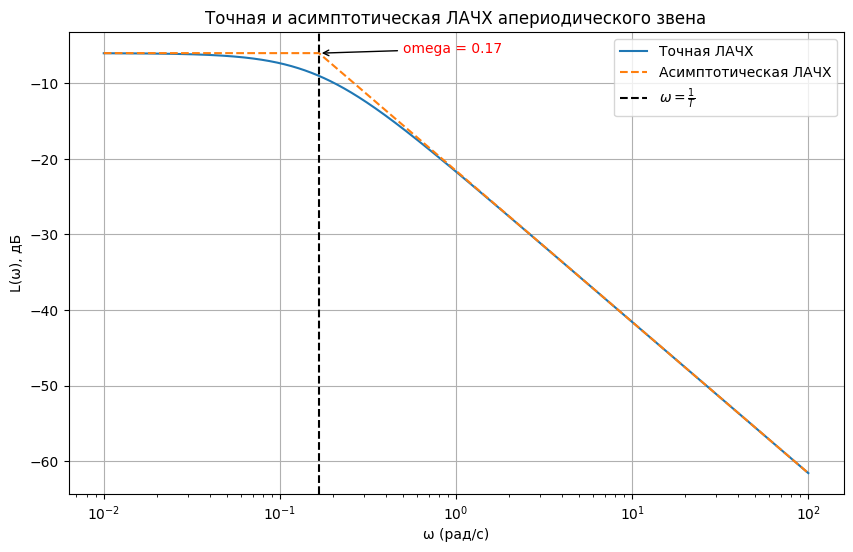

In [38]:
# Параметры апериодического звена
T = 6
k = 0.5

omega_log = np.logspace(start_log, end_log, separates)

L_omega = 20 * np.log10(k / np.sqrt(1 + (T * omega_log)**2))

low_freq_line  = 20 * np.log10(k) * np.ones_like (omega_log[omega_log <= 1 / T])
high_freq_line = 20 * np.log10(k) - 20 * np.log10(omega_log[omega_log > 1 / T] * T)
# Объединение
asymptotic_mag = np.concatenate([low_freq_line, high_freq_line])

plt.figure(figsize=(10, 6))
plt.semilogx(omega_log, L_omega, label="Точная ЛАЧХ")
plt.semilogx(omega_log, asymptotic_mag, label="Асимптотическая ЛАЧХ", linestyle="--")
plt.axvline(x=1 / T, color='black', linestyle='--', label=r'$\omega = \frac{1}{T}$')
plt.annotate(
    f'omega = {1/T:.2f}',
    xy=(1 / T,3 + 20 * np.log10(k) - 20 * np.log10(np.sqrt(1 + (T * (1 / T))**2))),
    xytext=(0.5, -6),
    arrowprops=dict(facecolor='red', arrowstyle='->'),
    fontsize=10,
    color='red'
)
plt.title("Точная и асимптотическая ЛАЧХ апериодического звена")
plt.xlabel("ω (рад/с)")
plt.ylabel("L(ω), дБ")
plt.grid(True)
plt.legend()
plt.show()


Самостоятельно изучить функцию tf. С помощью нее задать передаточную функцию апериодического звена с параметрами вашего варианта (при Т=2, к=1: sys=tf([1],[2 1])). Построить все известные вам характеристики для этого звена (см help ltiview).

C:\Users\Vyacheslav\AppData\Local\Temp\ipykernel_2288\2288958033.py:26: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax1.set_xlim([0,10])


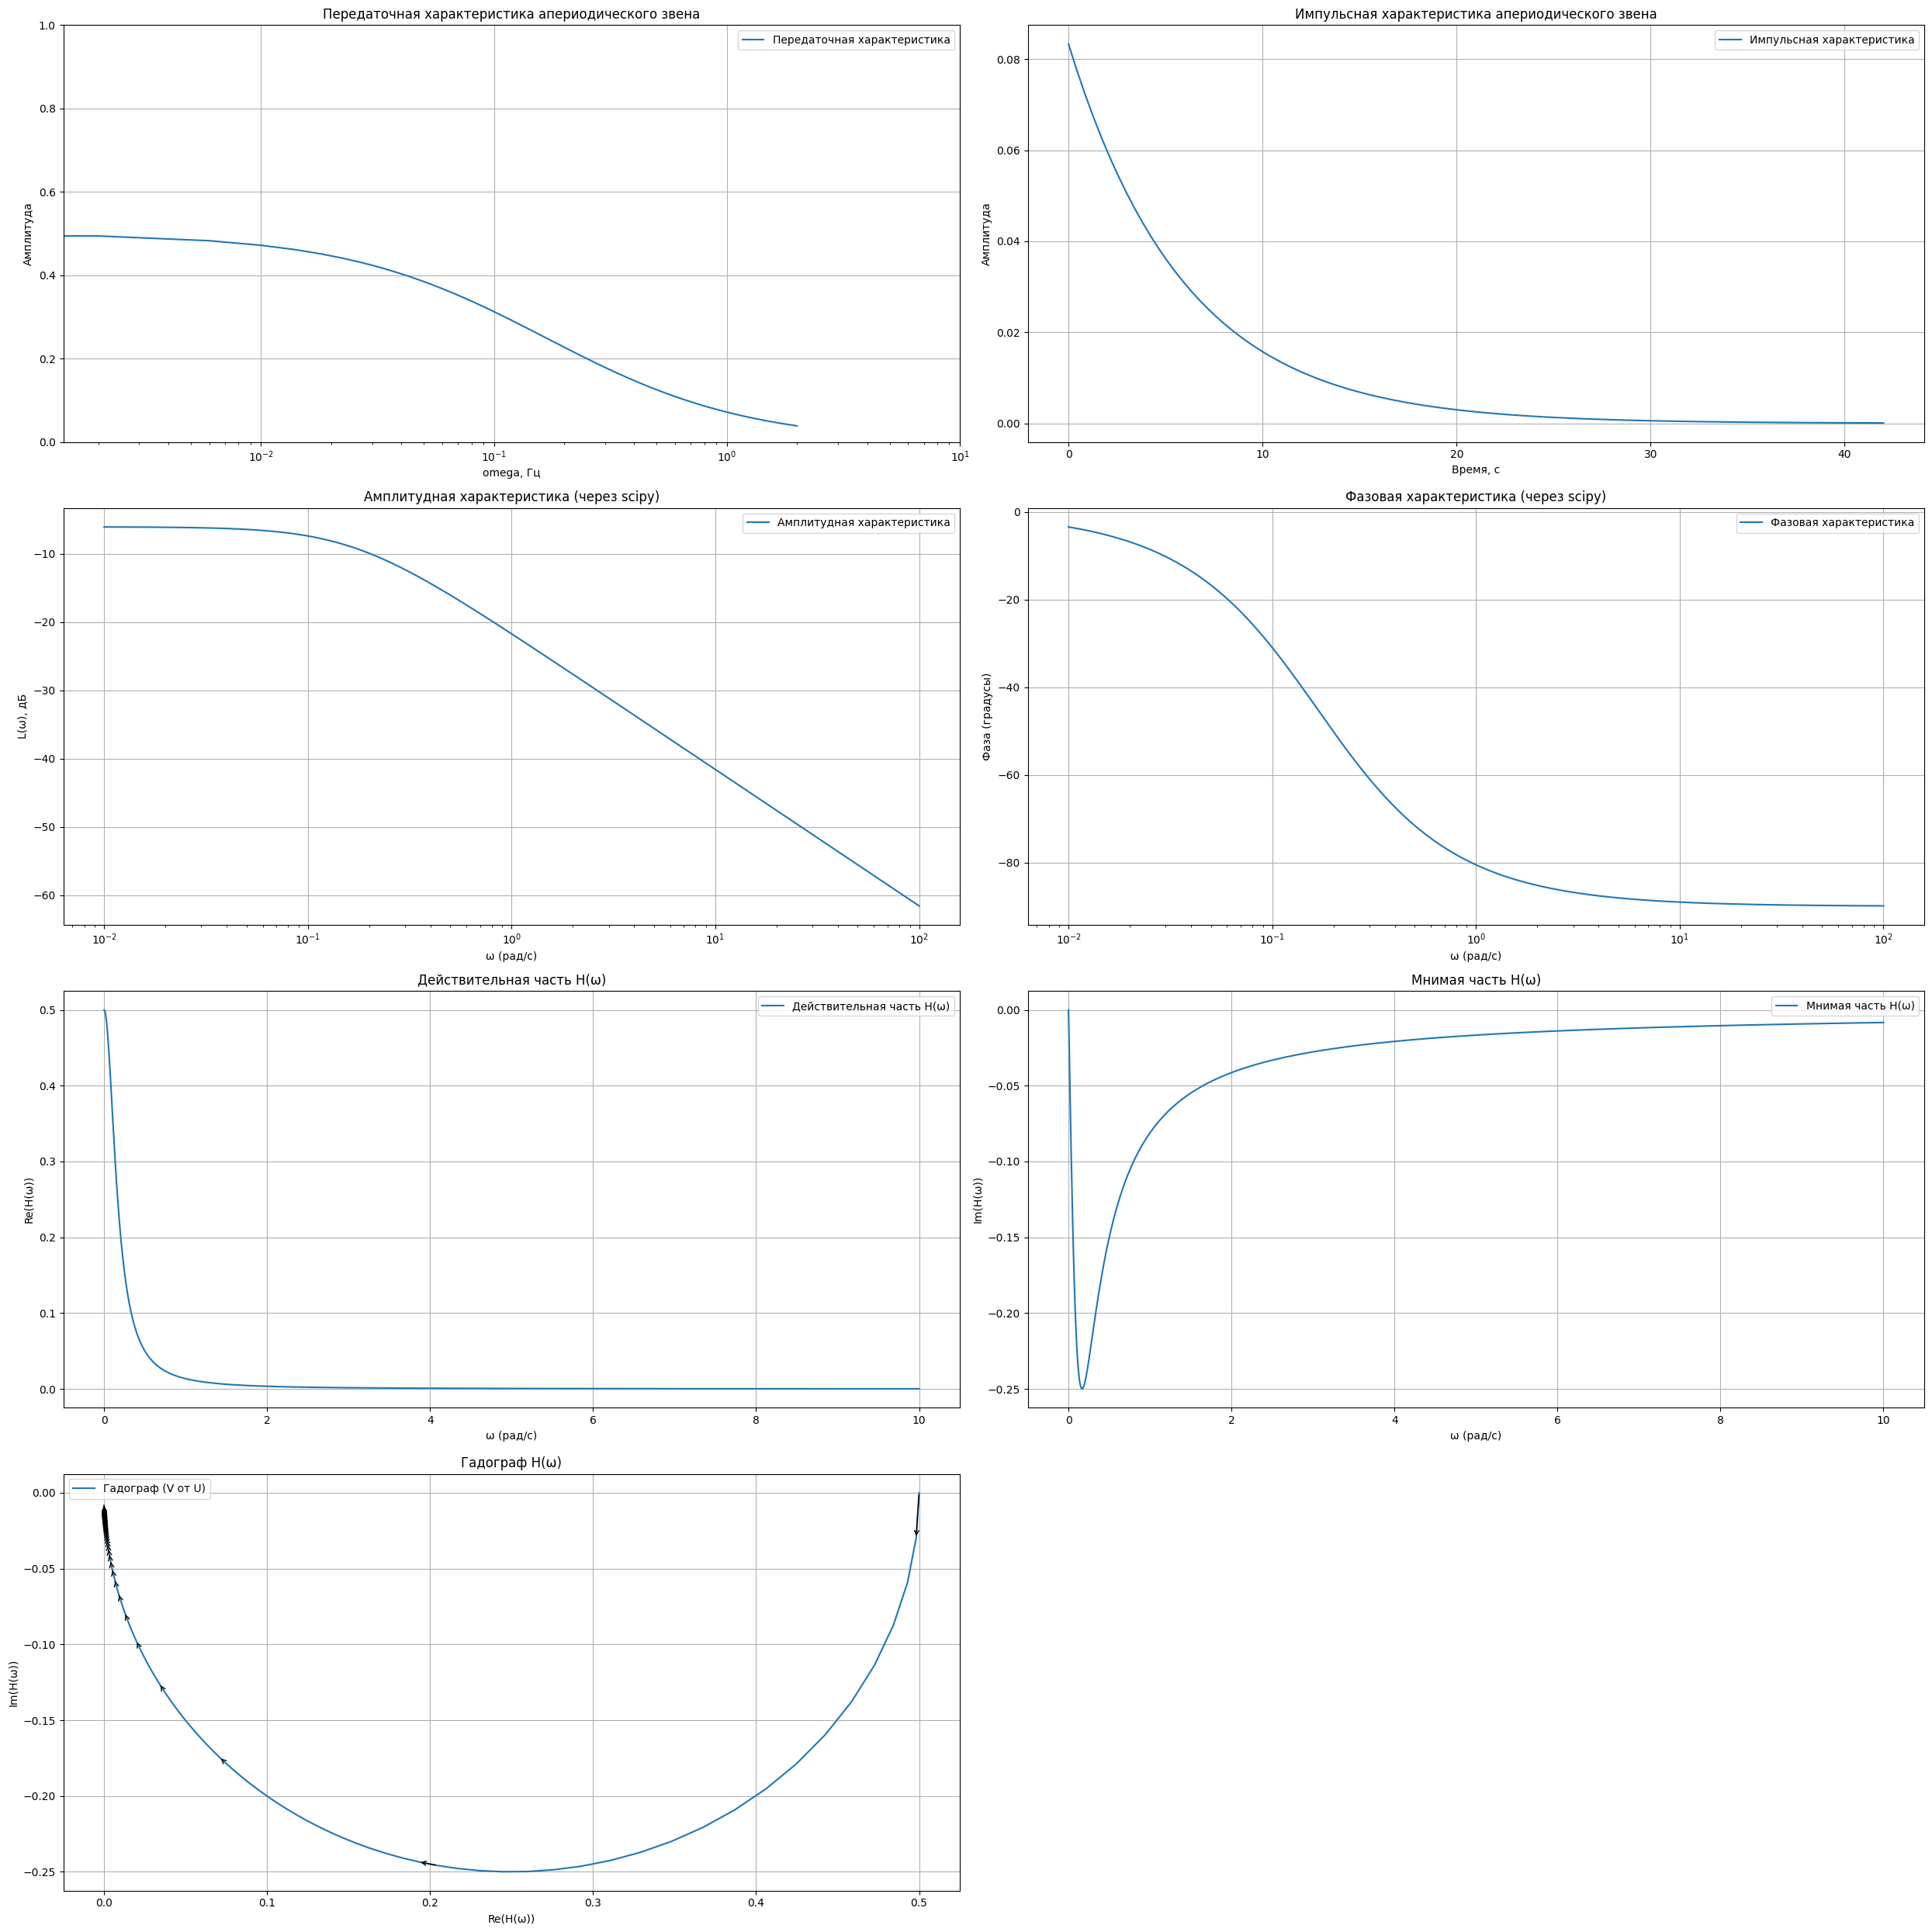

In [39]:
from scipy.signal import lsim

# Произвольный входной сигнал

# Параметры апериодического звена
T = 6
k = 0.5
omega_log = np.linspace(start_log, end_log, separates)

W = k / (T*omega_log+1)
num = [k]         # Числитель
den = [T, 1]      # Знаменатель
sys = TransferFunction(num, den)
t, step_response = step(sys)  # Используем scipy для расчёта переходной характеристики

# Переходная характеристика

plt.figure(figsize=(25, 25))

ax1 = plt.subplot(4, 2, 1)
ax1.semilogx(omega_log, W, label="Передаточная характеристика")
ax1.set_title("Передаточная характеристика апериодического звена")
ax1.set_xlabel("omega, Гц")
ax1.set_ylabel("Амплитуда")
ax1.set_ylim([0,1])
ax1.set_xlim([0,10])
ax1.grid(True)
ax1.legend()

t, impulse_response = impulse(sys)  # Используем scipy для расчёта импульсной характеристики

ax2 = plt.subplot(4, 2, 2)
ax2.plot(t, impulse_response, label="Импульсная характеристика")
ax2.set_title("Импульсная характеристика апериодического звена")
ax2.set_xlabel("Время, с")
ax2.set_ylabel("Амплитуда")
ax2.grid(True)
ax2.legend()

omega_log = np.logspace(start_log, end_log, separates)
_, L_omega, phi_exact = bode(sys, omega_log)

ax3 = plt.subplot(4, 2, 3)
ax3.semilogx(omega_log, L_omega, label="Амплитудная характеристика")
ax3.set_title("Амплитудная характеристика (через scipy)")
ax3.set_xlabel("ω (рад/с)")
ax3.set_ylabel("L(ω), дБ")
ax3.grid(True)
ax3.legend()

ax4 = plt.subplot(4, 2, 4)
ax4.semilogx(omega_log, phi_exact, label="Фазовая характеристика")
ax4.set_title("Фазовая характеристика (через scipy)")
ax4.set_xlabel("ω (рад/с)")
ax4.set_ylabel("Фаза (градусы)")
ax4.grid(True)
ax4.legend()

omega = np.linspace(start, end, separates)
real_part = k / (1 + (T * omega)**2)
imag_part = -k * T * omega / (1 + (T * omega)**2)

ax5 = plt.subplot(4, 2, 5)
ax5.plot(omega, real_part, label="Действительная часть H(ω)")
ax5.set_title("Действительная часть H(ω)")
ax5.set_xlabel("ω (рад/с)")
ax5.set_ylabel("Re(H(ω))")
ax5.grid(True)
ax5.legend()

ax6 = plt.subplot(4, 2, 6)
ax6.plot(omega, imag_part, label="Мнимая часть H(ω)")
ax6.set_title("Мнимая часть H(ω)")
ax6.set_xlabel("ω (рад/с)")
ax6.set_ylabel("Im(H(ω))")
ax6.grid(True)
ax6.legend()

ax7 = plt.subplot(4, 2, 7)
ax7.plot(real_part, imag_part, label="Гадограф (V от U)")
ax7.set_title("Гадограф H(ω)")
ax7.set_xlabel("Re(H(ω))")
ax7.set_ylabel("Im(H(ω))")
ax7.grid(True)
ax7.legend()

for i in range(0, len(real_part) - 1, 20):
    ax7.annotate('', xy=(real_part[i + 1], imag_part[i + 1]),
                 xytext=(real_part[i], imag_part[i]),
                 arrowprops=dict(facecolor='red', arrowstyle='->'))

plt.tight_layout()
plt.show()


Построить с помощью функции plot графики А(omega), fi(omega), U(omega), V(omega), L(omega) для колебательного звена. Параметры Т и К взять из таблицы 1. . Изучить влияние параметров Т и epsilon на вид fi(omega) и L(omega). Сделать выводы

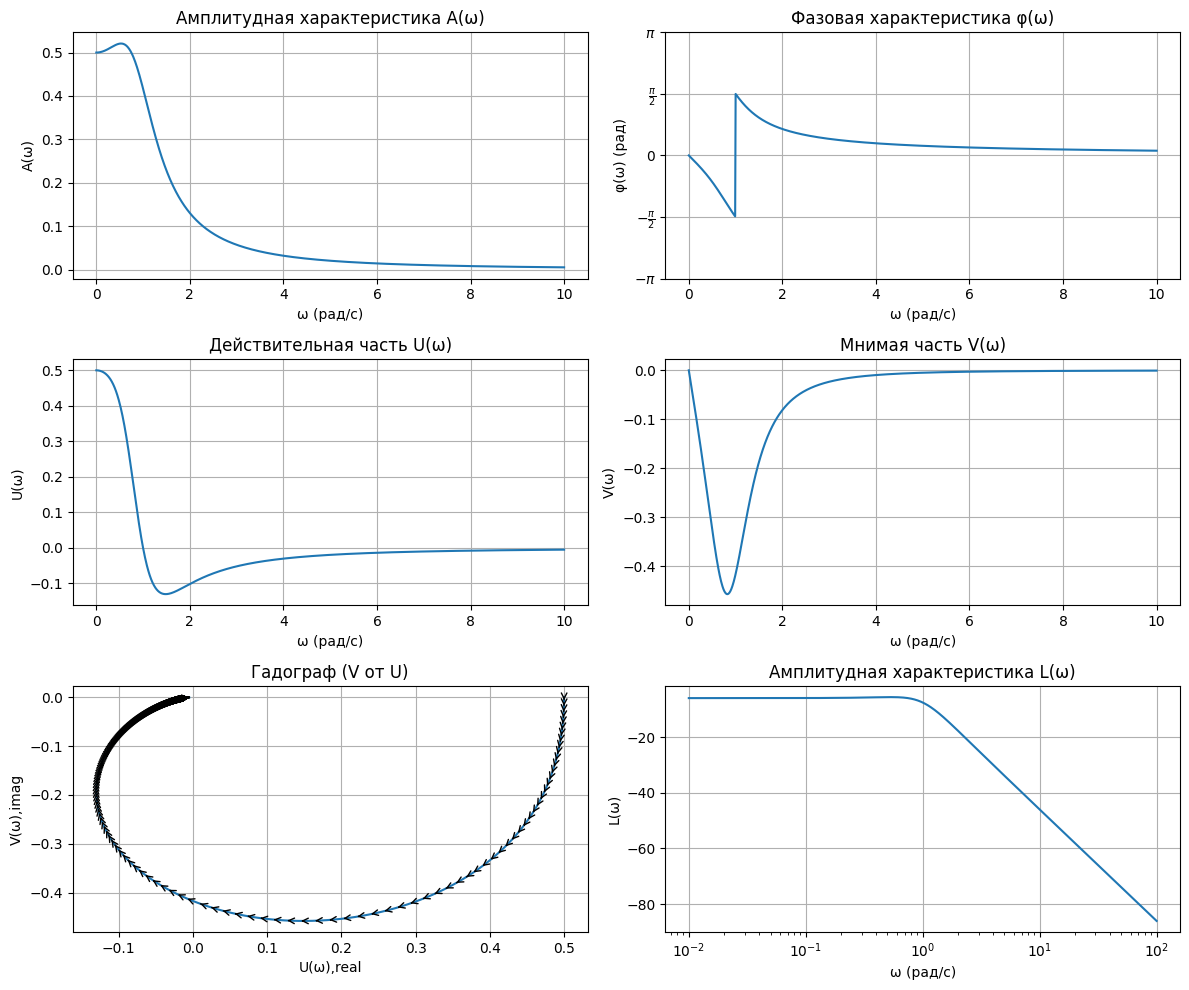

In [47]:
# Заданные параметры


k = 0.5
T = T1 = 1
T2 = 4
epsilon = 0.6

omega_log = np.logspace(start_log, end_log, separates)
omega     = np.linspace(start, end, separates)

# Частотные характеристики колебательного звена
U_omega = (k*(1-T**2*omega**2)) / ((1-T**2*omega**2)**2 + (2*epsilon*T*omega)**2)
V_omega = -(2*k*epsilon*T*omega) / ((1-T**2*omega**2)**2 + (2*epsilon*T*omega)**2)

U_omega_log = (k*(1-T**2*omega_log**2)) / ((1-T**2*omega_log**2)**2 + (2*epsilon*T*omega_log)**2)
V_omega_log = -(2*k*epsilon*T*omega_log) / ((1-T**2*omega_log**2)**2 + (2*epsilon*T*omega_log)**2)

A_omega = np.sqrt(V_omega**2 + U_omega**2)
A_omega_log = np.sqrt(V_omega_log**2 + U_omega_log**2)
L_omega = 20 * np.log10(A_omega_log)
phi_omega = np.arctan(V_omega/U_omega)


plt.figure(figsize=(12, 10))

ax1 = plt.subplot(3, 2, 1)
ax1.plot(omega, A_omega)
ax1.set_title("Амплитудная характеристика A(ω)")
ax1.set_xlabel("ω (рад/с)")
ax1.set_ylabel("A(ω)")
ax1.grid(True)

ax2 = plt.subplot(3, 2, 2)
ax2.plot(omega, phi_omega)
ax2.set_title("Фазовая характеристика φ(ω)")
ax2.set_xlabel("ω (рад/с)")
ax2.set_ylabel("φ(ω) (рад)")
ax2.set_yticks(np.arange(-np.pi, np.pi + np.pi / 2, np.pi / 2))  # От -π до π с шагом π/2
ax2.set_yticklabels([r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'])
ax2.grid(True)

ax3 = plt.subplot(3, 2, 3)
ax3.plot(omega, U_omega)
ax3.set_title("Действительная часть U(ω)")
ax3.set_xlabel("ω (рад/с)")
ax3.set_ylabel("U(ω)")
# Установка делений
# minor_ticks_x = np.arange(start, end + 0.25, 0.25)
# major_ticks_x = np.arange(start, end + 1, 1)

# ax3.set_xticks(minor_ticks_x, minor=True)
# ax3.set_xticks(major_ticks_x)
# ax3.set_xticklabels([f"{int(x)}" for x in major_ticks_x])

# # Установка делений по оси Y
# minor_ticks_y = np.arange(-0.2, 0.6, 0.1)
# major_ticks_y = np.arange(-0.2, 0.6, 0.5)

# ax3.set_yticks(minor_ticks_y, minor=True)
# ax3.set_yticks(major_ticks_y)
# ax3.set_yticklabels([f"{y:.1f}" for y in major_ticks_y])

# Добавление сетки от минорных и основных делений
ax3.grid(True, which='both')
# ax3.grid(True, which='minor', linestyle='--', linewidth=0.5)
# ax3.grid(True, which='major', linestyle='-', linewidth=1)

ax4 = plt.subplot(3, 2, 4)
ax4.plot(omega, V_omega)
ax4.set_title("Мнимая часть V(ω)")
ax4.set_xlabel("ω (рад/с)")
ax4.set_ylabel("V(ω)")
ax4.grid(True)

ax5 = plt.subplot(3, 2, 5)
ax5.plot(U_omega, V_omega, label="Гадограф")
ax5.set_title("Гадограф (V от U)")
ax5.set_xlabel("U(ω),real")
ax5.set_ylabel("V(ω),imag")
ax5.grid(True)

# # Добавление стрелок для указания направления гадографа
for i in range(0, len(U_omega) - 1, 2):
    ax5.annotate('', xy=(U_omega[i + 1], V_omega[i + 1]), xytext=(U_omega[i], V_omega[i]),
                arrowprops=dict(facecolor='red', arrowstyle='->'))

ax6 = plt.subplot(3, 2, 6)
ax6.semilogx(omega_log, L_omega)
ax6.set_title("Амплитудная характеристика L(ω)")
ax6.set_xlabel("ω (рад/с)")
ax6.set_ylabel("L(ω)")
ax6.grid(True)

plt.tight_layout()
plt.show()


Построить в одном окне асимптотическую и точную ЛАЧХ колебательного звена. Сделать выводы

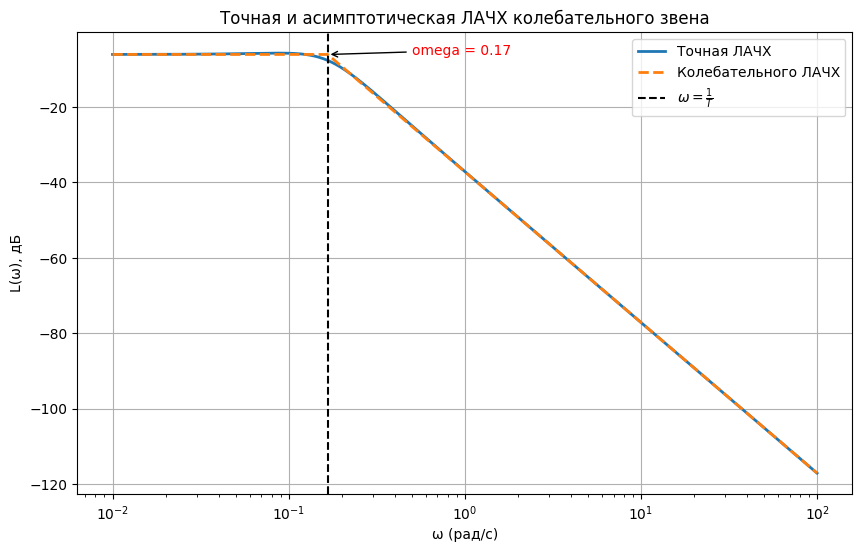

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры апериодического звена
T = 6
k = 0.5

omega_log = np.logspace(start_log, end_log, separates)

L_omega = 20 * np.log10(k)-20 * np.log10(np.sqrt((1 - (T * omega_log)**2)**2 + (2 * epsilon * T * omega_log)**2))

low_freq_line = 20 * np.log10(k) * np.ones_like(omega_log[omega_log <= 1 / T])

# Corrected condition
#omega_log[omega_log > 1 / T]
asymptotic_L = np.where(omega_log < 1/T, 20 * np.log10(k), 20 * np.log10(k)-20 * np.log10(omega_log**2 * T**2))

plt.figure(figsize=(10, 6))
plt.semilogx(omega_log, L_omega, label="Точная ЛАЧХ", linewidth=2)
plt.semilogx(omega_log, asymptotic_L, label="Колебательного ЛАЧХ", linestyle="--", linewidth=2)

plt.axvline(x=1 / T, color='black', linestyle='--', label=r'$\omega = \frac{1}{T}$')

plt.annotate(
    f'omega = {1/T:.2f}',
    xy=(1 / T,3 + 20 * np.log10(k) - 20 * np.log10(np.sqrt(1 + (T * (1 / T))**2))),
    xytext=(0.5, -6),
    arrowprops=dict(facecolor='red', arrowstyle='->'),
    fontsize=10,
    color='red'
)

plt.title("Точная и асимптотическая ЛАЧХ колебательного звена")
plt.xlabel("ω (рад/с)")
plt.ylabel("L(ω), дБ")
plt.grid(True)
plt.legend()
plt.show()


С помощью функции tf  задать передаточную функцию колебательного звена с параметрами вашего варианта. Построить все известные вам характеристики для этого звена

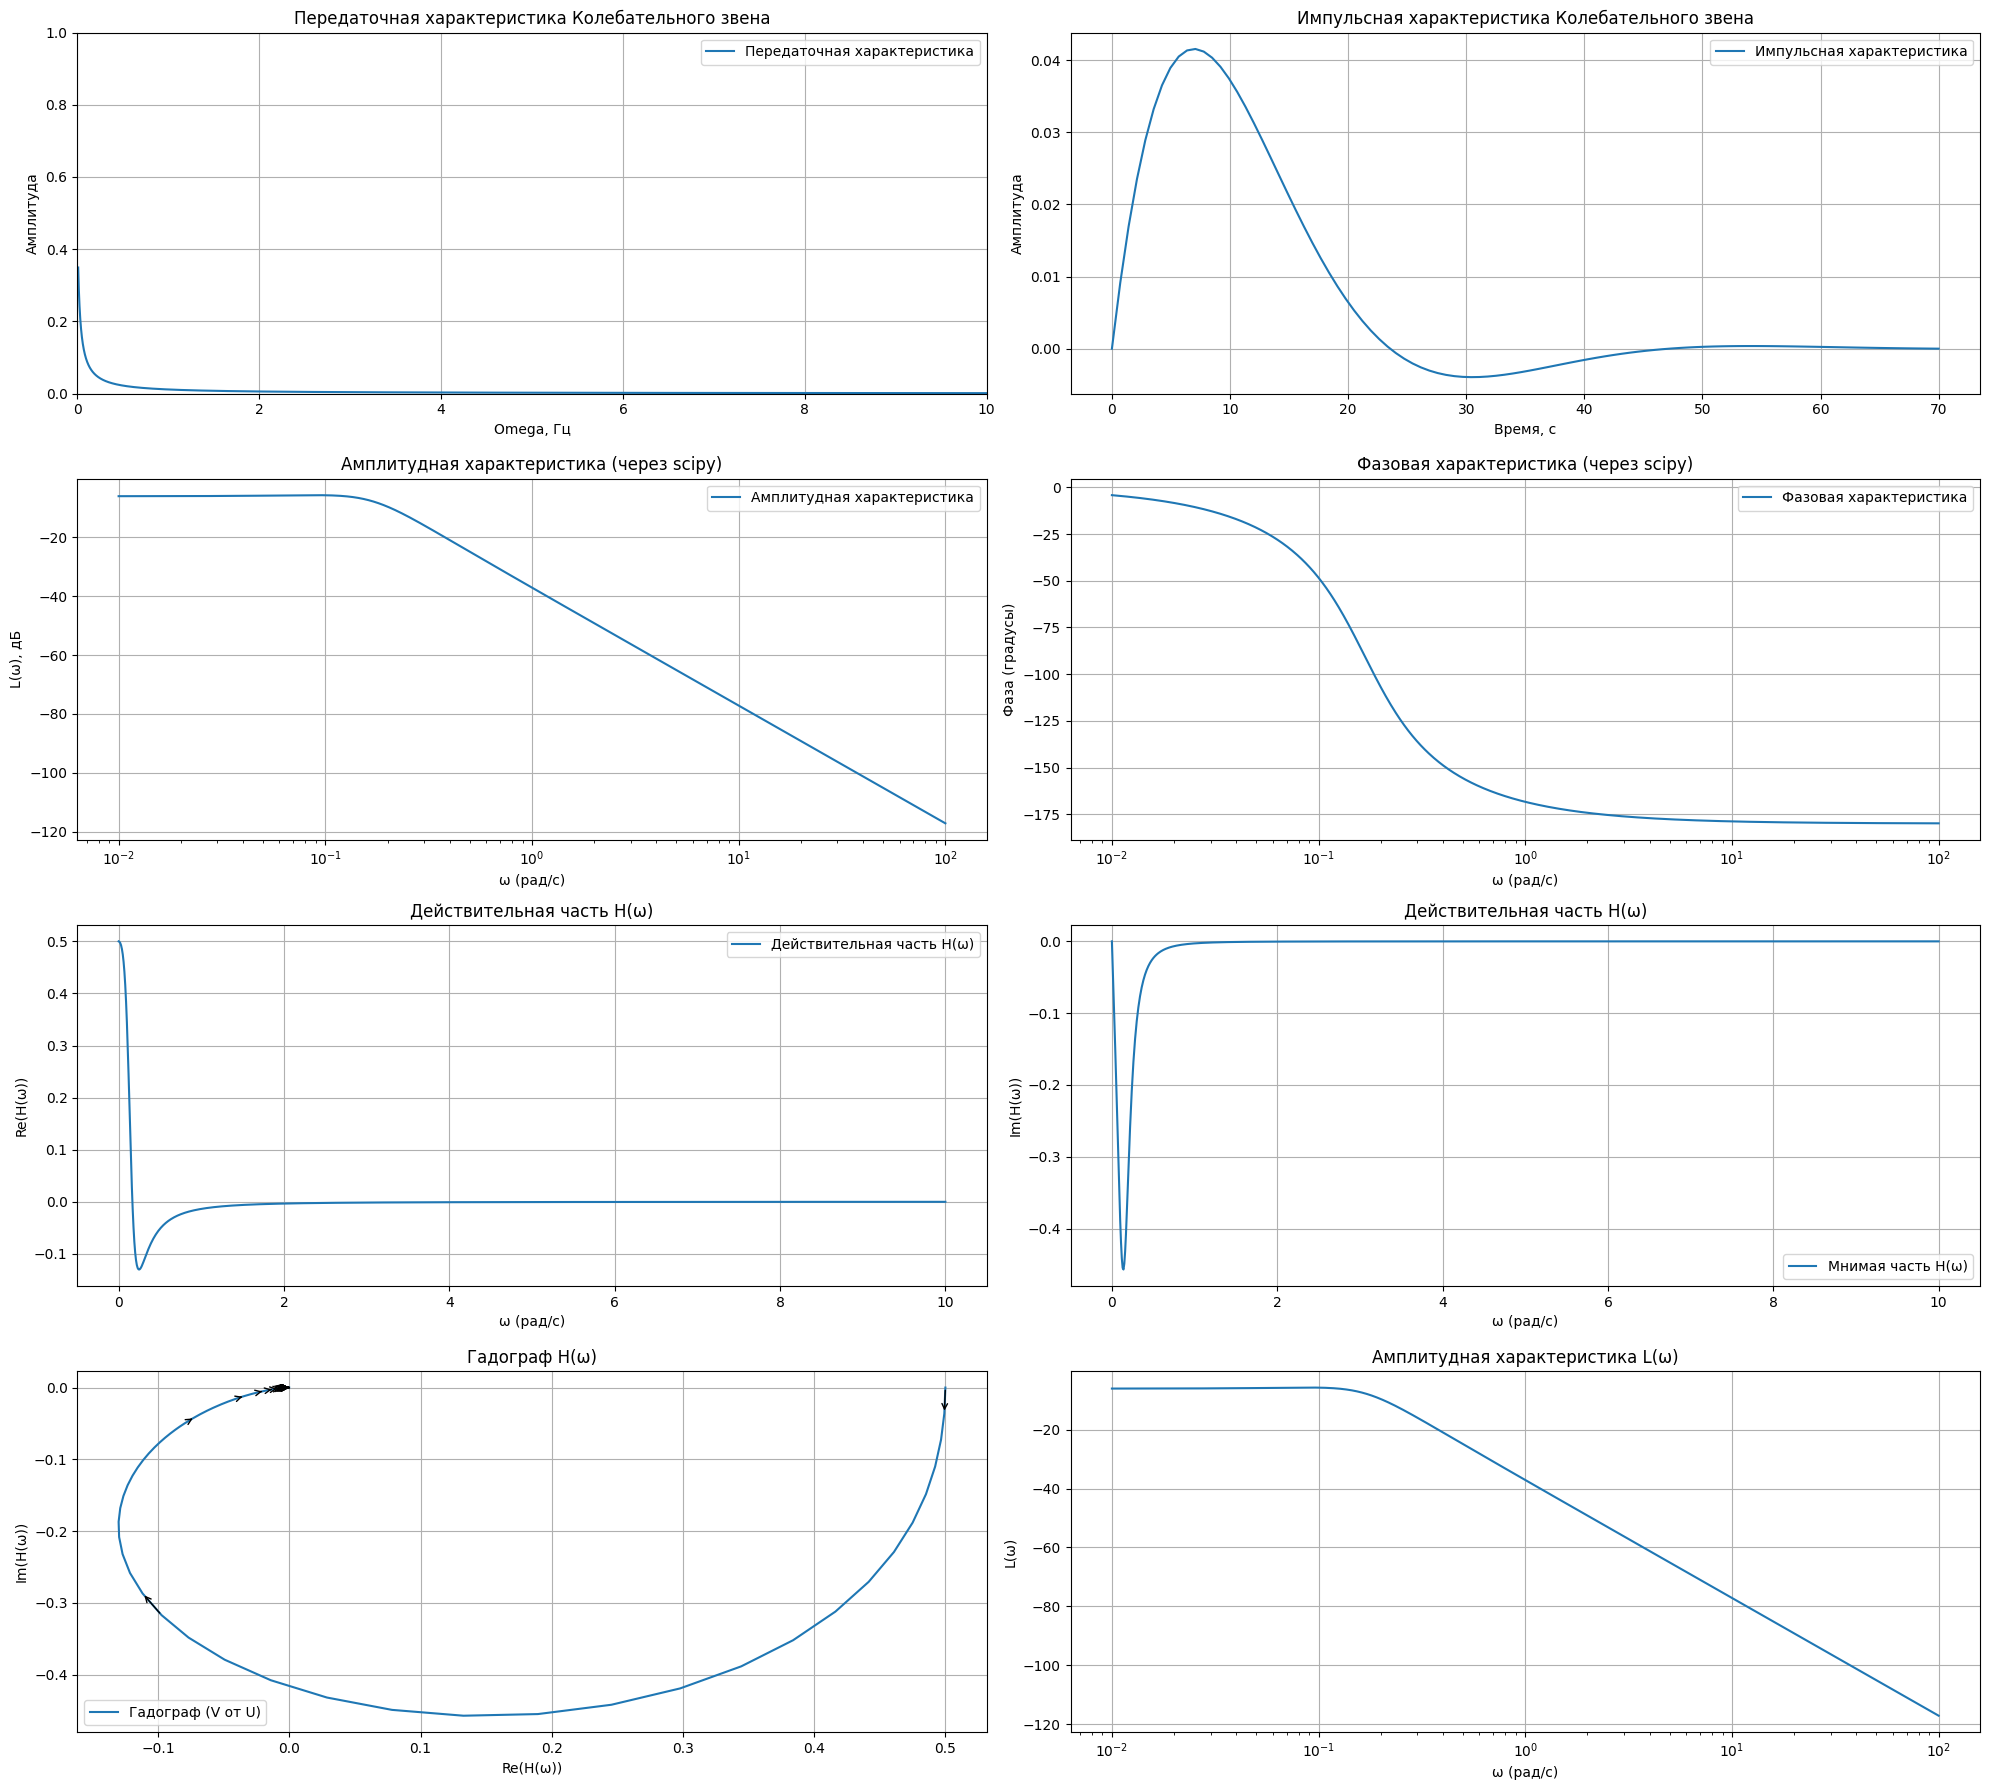

In [42]:

# Параметры апериодического звена
T = 6
k = 0.5

omega_log = np.logspace(start_log, end_log, separates)
# Создание передаточной функции H(s) = k / (T * s + 1)
num = [k]         # Числитель
den = [T**2,2*epsilon*T, 1]      # Знаменатель
sys = TransferFunction(num, den)
W = k / (T**2*omega_log + 2*epsilon*T*omega_log + 1)
# Переходная характеристика
t, step_response = step(sys)  # Используем scipy для расчёта переходной характеристики

plt.figure(figsize=(20, 18))


ax1 = plt.subplot(4, 2, 1)
ax1.plot(omega_log, W, label="Передаточная характеристика")
ax1.set_title("Передаточная характеристика Колебательного звена")
ax1.set_xlabel("Omega, Гц")
ax1.set_ylabel("Амплитуда")
ax1.set_ylim([0,1])
ax1.set_xlim([0,10])
ax1.grid(True)
ax1.legend()

t, impulse_response = impulse(sys)  # Используем scipy для расчёта импульсной характеристики

ax2 = plt.subplot(4, 2, 2)
ax2.plot(t, impulse_response, label="Импульсная характеристика")
ax2.set_title("Импульсная характеристика Колебательного звена")
ax2.set_xlabel("Время, с")
ax2.set_ylabel("Амплитуда")
ax2.grid(True)
ax2.legend()

_, L_omega, phi_exact = bode(sys, omega_log)

ax3 = plt.subplot(4, 2, 3)
ax3.semilogx(omega_log, L_omega, label="Амплитудная характеристика")
ax3.set_title("Амплитудная характеристика (через scipy)")
ax3.set_xlabel("ω (рад/с)")
ax3.set_ylabel("L(ω), дБ")
ax3.grid(True)
ax3.legend()

ax4 = plt.subplot(4, 2, 4)
ax4.semilogx(omega_log, phi_exact, label="Фазовая характеристика")
ax4.set_title("Фазовая характеристика (через scipy)")
ax4.set_xlabel("ω (рад/с)")
ax4.set_ylabel("Фаза (градусы)")
ax4.grid(True)
ax4.legend()

omega = np.linspace(start, end, separates)
real_part =  (k*(1-T**2*omega**2)) / ((1-T**2*omega**2)**2 + (2*epsilon*T*omega)**2)
imag_part =  -(2*k*epsilon*T*omega) / ((1-T**2*omega**2)**2 + (2*epsilon*T*omega)**2)

ax5 = plt.subplot(4, 2, 5)
ax5.plot(omega, real_part, label="Действительная часть H(ω)")
ax5.set_title("Действительная часть H(ω)")
ax5.set_xlabel("ω (рад/с)")
ax5.set_ylabel("Re(H(ω))")
ax5.grid(True)
ax5.legend()

ax6 = plt.subplot(4, 2, 6)
ax6.plot(omega, imag_part, label="Мнимая часть H(ω)")
ax6.set_title("Действительная часть H(ω)")
ax6.set_xlabel("ω (рад/с)")
ax6.set_ylabel("Im(H(ω))")
ax6.grid(True)
ax6.legend()

ax7 = plt.subplot(4, 2, 7)
ax7.plot(real_part, imag_part, label="Гадограф (V от U)")
ax7.set_title("Гадограф H(ω)")
ax7.set_xlabel("Re(H(ω))")
ax7.set_ylabel("Im(H(ω))")
ax7.grid(True)
ax7.legend()


for i in range(0, len(real_part) - 1, 20):
    ax7.annotate('', xy=(real_part[i + 1], imag_part[i + 1]),
                 xytext=(real_part[i], imag_part[i]),
                 arrowprops=dict(facecolor='red', arrowstyle='->'))

ax8 = plt.subplot(4, 2, 8)
ax8.semilogx(omega_log, L_omega)
ax8.set_title("Амплитудная характеристика L(ω)")
ax8.set_xlabel("ω (рад/с)")
ax8.set_ylabel("L(ω)")
ax8.grid(True)

plt.tight_layout()
plt.show()


Построить точную и асимптотическую ЛАЧХ для сложной системы с передаточной функцией W(p)= k⋅p / (T1​⋅p+1)⋅(T2^2​⋅p^2+2⋅T2​⋅ξ⋅p+1)

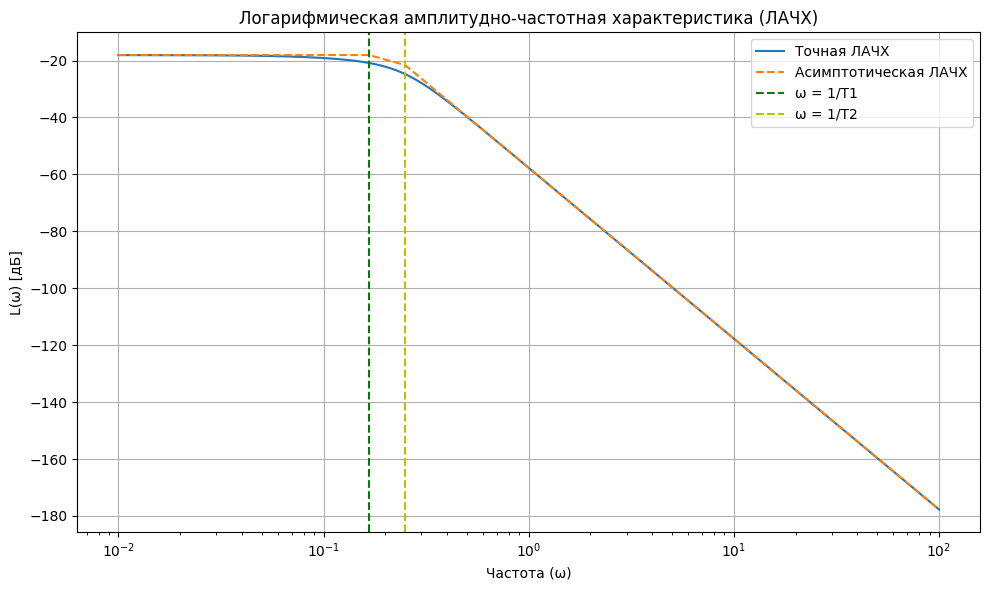

In [43]:
# Диапазон частот
omega_log = np.logspace(start_log, end_log, separates)  # Логарифмическая шкала частот



# Логарифмическая амплитудно-частотная характеристика0 (ЛАЧХ0)
L0 = 20 * np.log10(k)

# Асимптотическая ЛАЧХ0
asymptotic_L0 = np.where(omega_log < 1/T1, 20 * np.log10(k), 20 * np.log10(k))

# Логарифмическая амплитудно-частотная характеристика1 (ЛАЧХ1)
L1 = 20 * np.log10(k)-20 * np.log10(np.sqrt((T1 * omega_log)**2 + 1))

# Асимптотическая ЛАЧХ1
asymptotic_L1 = np.where(omega_log < 1/T1, 20 * np.log10(k), -20 * np.log10(omega_log * T1) + 20 * np.log10(k))

# Логарифмическая амплитудно-частотная характеристика2 (ЛАЧХ2)
L2 = 20 * np.log10(k)-20 * np.log10(np.sqrt((1 - (T2 * omega_log)**2)**2 + (2 * epsilon * T2 * omega_log)**2))

# Асимптотическая ЛАЧХ2
asymptotic_L2 = np.where(omega_log < 1/T2, 20 * np.log10(k), 20 * np.log10(k)-20 * np.log10(omega_log**2 * T2**2))

# Построение графиков
plt.figure(figsize=(10, 6))

L = L0 + L1 + L2
# asymptotic = np.where(omega < 1/T1, 20 * np.log10(1), np.where(omega < 1/T2, asymptotic_L1, asymptotic_L2))

# ЛАЧХ
plt.plot(omega_log, L, label='Точная ЛАЧХ')
plt.plot(omega_log, asymptotic_L0 + asymptotic_L1 + asymptotic_L2, linestyle='--', label='Асимптотическая ЛАЧХ')
plt.axvline(1 / T1, color='g', linestyle='--', label='ω = 1/T1')
plt.axvline(1 / T2, color='y', linestyle='--', label='ω = 1/T2')
plt.title('Логарифмическая амплитудно-частотная характеристика (ЛАЧХ)')
plt.xlabel('Частота (ω)')
plt.ylabel('L(ω) [дБ]')
plt.xscale('log')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Построить ЛФЧХ типовых звеньев, входящих в эту систему. Построить ЛФЧХ данной системы

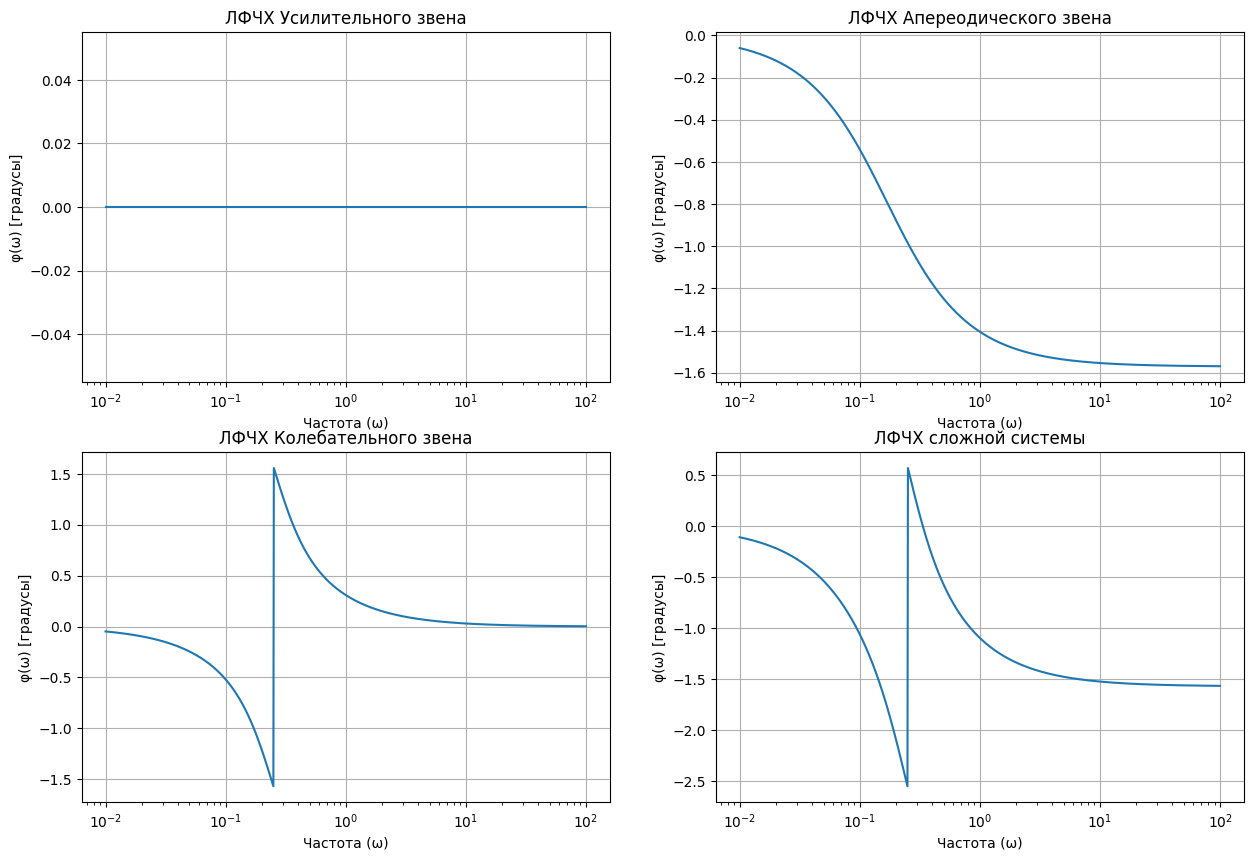

In [44]:
# Фазочастотная характеристика0 (ФЧХ0)
phi0 = np.arctan(omega_log*0)

# Фазочастотная характеристика1 (ФЧХ1)
phi1 = -np.arctan(omega_log * T1)

# Фазочастотная характеристика2 (ФЧХ2)
phi2 = -np.arctan((2 * epsilon * T2 * omega_log) / (1 - (T2 * omega_log)**2))


# Построение графиков
plt.figure(figsize=(15, 10))
# ФЧХ0
ax1 = plt.subplot(2, 2, 1)
ax1.plot(omega_log, phi0)
# plt.axvline(1 / T, color='g', linestyle='--', label='ω = 1/T')
ax1.set_title('ЛФЧХ Усилительного звена')
ax1.set_xlabel('Частота (ω)')
ax1.set_ylabel('φ(ω) [градусы]')
ax1.set_xscale('log')
ax1.grid(True)

# ФЧХ1
ax2 = plt.subplot(2, 2, 2)
ax2.plot(omega_log, phi1)
ax2.set_title('ЛФЧХ Апереодического звена')
ax2.set_xlabel('Частота (ω)')
ax2.set_ylabel('φ(ω) [градусы]')
ax2.set_xscale('log')
ax2.grid(True)


# ФЧХ2
ax3 = plt.subplot(2, 2, 3)
ax3.plot(omega_log, phi2)
ax3.set_title('ЛФЧХ Колебательного звена')
ax3.set_xlabel('Частота (ω)')
ax3.set_ylabel('φ(ω) [градусы]')
ax3.set_xscale('log')
ax3.grid(True)



# ФЧХ3
ax4 = plt.subplot(2, 2, 4)
ax4.plot(omega_log, phi0 + phi1 + phi2)
ax4.set_title('ЛФЧХ сложной системы')
ax4.set_xlabel('Частота (ω)')
ax4.set_ylabel('φ(ω) [градусы]')
ax4.set_xscale('log')
ax4.grid(True)


С помощью функции ltiview построить переходные функции всех упомянутых выше звеньев. По полученным графикам сделать выводы

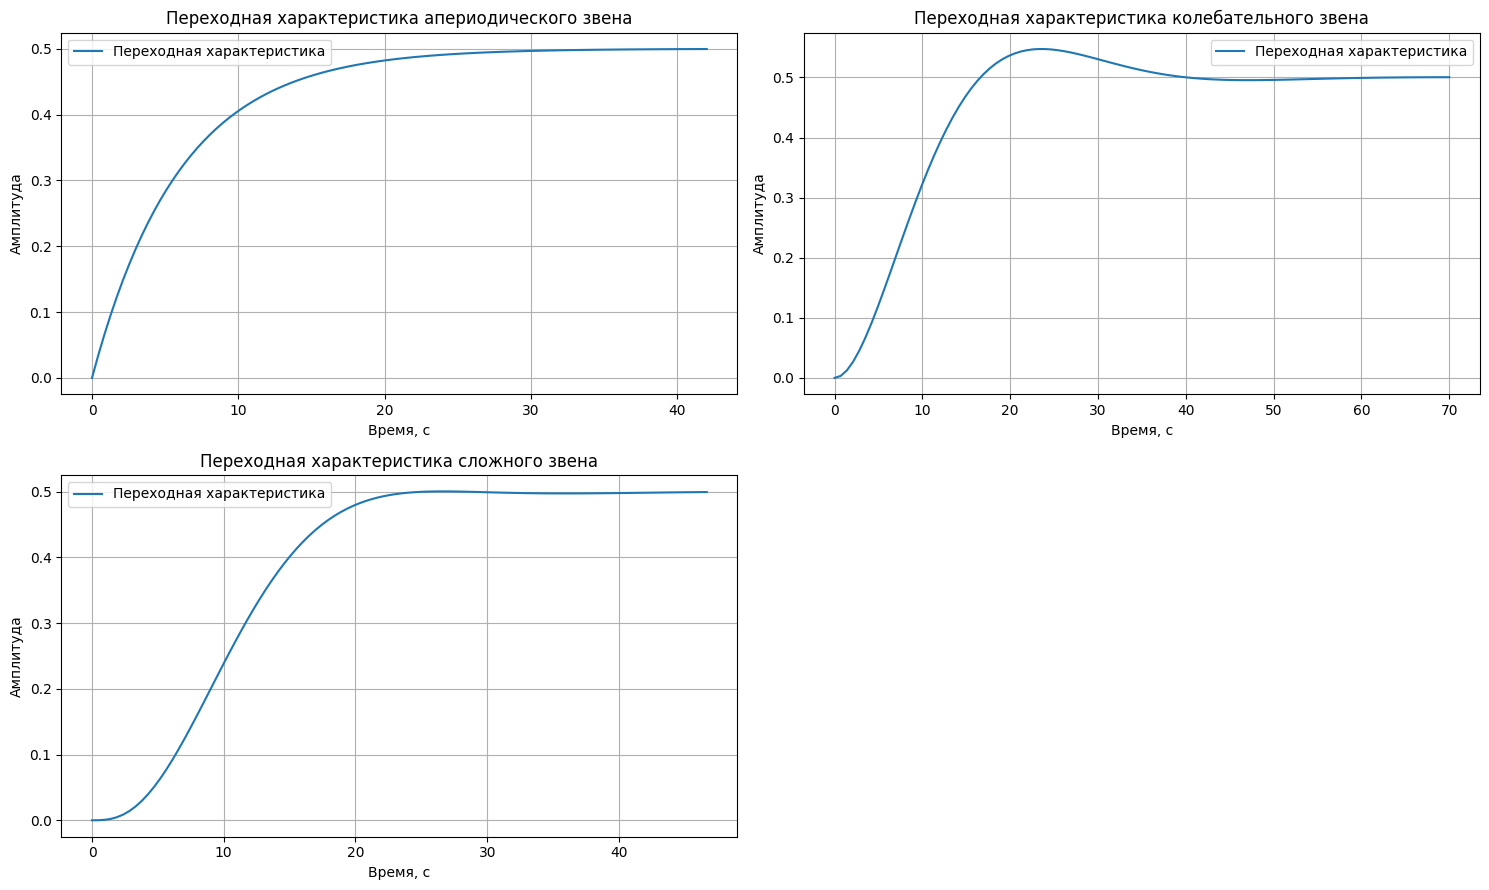

In [45]:
T = 6
k = 0.5

num_aperiod = [k]         # Числитель
den_aperiod = [T, 1]      # Знаменатель
sys_aperiod = TransferFunction(num_aperiod, den_aperiod)
t_aperiod, step_response_aperiod = step(sys_aperiod)  # Используем scipy для расчёта переходной характеристики


num_coleb = [k]         # Числитель
den_coleb = [T**2,2*epsilon*T, 1]      # Знаменатель
sys_coleb = TransferFunction(num_coleb, den_coleb)
t_coleb, step_response_coleb = step(sys_coleb)  # Используем scipy для расчёта переходной характеристики


num_complex = [k]

# Знаменатель: произведение (T1p + 1) и (T2^2p^2 + 2T2*xi*p + 1)
den_complex = [T1, 1]
den_complex2 = [T2**2, 2*T2*epsilon, 1]
den_complex = np.polymul(den_complex, den_complex2)


sys_complex = TransferFunction(num_complex, den_complex)
t_complex, step_response_complex = step(sys_complex)  # Используем scipy для расчёта переходной характеристики

plt.figure(figsize=(15, 9))


ax1 = plt.subplot(2, 2, 1)
ax1.plot(t_aperiod, step_response_aperiod, label="Переходная характеристика")
ax1.set_title("Переходная характеристика апериодического звена")
ax1.set_xlabel("Время, с")
ax1.set_ylabel("Амплитуда")
ax1.grid(True)
ax1.legend()

ax1 = plt.subplot(2, 2, 2)
ax1.plot(t_coleb, step_response_coleb, label="Переходная характеристика")
ax1.set_title("Переходная характеристика колебательного звена")
ax1.set_xlabel("Время, с")
ax1.set_ylabel("Амплитуда")
ax1.grid(True)
ax1.legend()

ax1 = plt.subplot(2, 2, 3)
ax1.plot(t_complex, step_response_complex, label="Переходная характеристика")
ax1.set_title("Переходная характеристика сложного звена")
ax1.set_xlabel("Время, с")
ax1.set_ylabel("Амплитуда")
ax1.grid(True)
ax1.legend()

plt.tight_layout()
plt.show()